In [1]:
import os
os.chdir("../../../")

In [2]:
import torch
from torchts.nn.models.ode import ODESolver
import numpy as np

import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3

In [5]:
# Duffing equation: Second order ODE system
dt = 0.01

def x_prime(prev_val, coeffs):
    return torch.cos(coeffs["w"]*prev_val["x"])

ode = {"x": x_prime}

# Initial conditions [0,0,0]
ode_init = {"x": 0}

# Constants (Parameters)
ode_coeffs = {"w": 5.}


# 4th Order Runge-Kutta - Data Generation for nt = 1000

In [6]:
ode_solver = ODESolver(
    ode=ode,
    init_vars=ode_init,
    init_coeffs=ode_coeffs,
    dt=dt,
    solver="rk4",
    optimizer=None
)

result = ode_solver(1000)

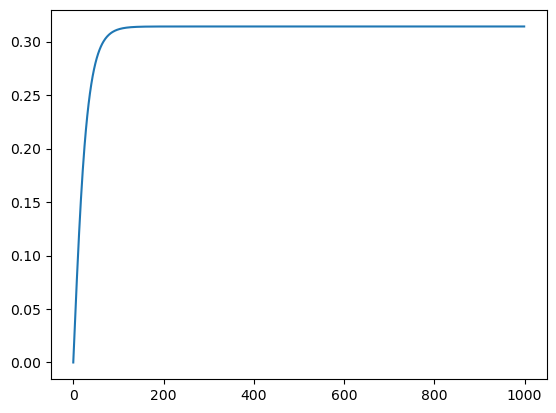

In [8]:
result_np = result.detach().numpy() # Convert to numpy array

# 2D plot of X and Z
plt.plot(result_np[:,0])

plt.show()

# Euler's method for training

In [9]:
ode_train_coeffs = {"w": 1.}

ode_solver_train = ODESolver(
    ode=ode,
    init_vars=ode_init,
    init_coeffs=ode_train_coeffs,
    dt=dt,
    solver="euler",
    optimizer=None
)

In [10]:
ode_solver_train.fit_random_sample(
    result,torch.optim.Adam,
    {"lr": 0.5},
    max_epochs=10
)

Epoch: 0	 Loss: tensor(1.2359e-05, grad_fn=<MseLossBackward>)
{'w': Parameter containing:
tensor(6.0375, requires_grad=True)}
Epoch: 1	 Loss: tensor(1.2707e-06, grad_fn=<MseLossBackward>)
{'w': Parameter containing:
tensor(4.7501, requires_grad=True)}
Epoch: 2	 Loss: tensor(2.7073e-08, grad_fn=<MseLossBackward>)
{'w': Parameter containing:
tensor(4.8977, requires_grad=True)}
Epoch: 3	 Loss: tensor(1.1740e-07, grad_fn=<MseLossBackward>)
{'w': Parameter containing:
tensor(5.0984, requires_grad=True)}
Epoch: 4	 Loss: tensor(3.1233e-10, grad_fn=<MseLossBackward>)
{'w': Parameter containing:
tensor(5.0082, requires_grad=True)}
Epoch: 5	 Loss: tensor(4.2481e-09, grad_fn=<MseLossBackward>)
{'w': Parameter containing:
tensor(4.9832, requires_grad=True)}
Epoch: 6	 Loss: tensor(8.0158e-10, grad_fn=<MseLossBackward>)
{'w': Parameter containing:
tensor(4.9903, requires_grad=True)}
Epoch: 7	 Loss: tensor(1.2423e-10, grad_fn=<MseLossBackward>)
{'w': Parameter containing:
tensor(4.9958, requires_grad

In [11]:
ode_solver_train.coeffs

{'w': Parameter containing:
 tensor(4.9982, requires_grad=True)}

# Predictions for nt = 1000

In [16]:
results_test = ode_solver_train(1000)

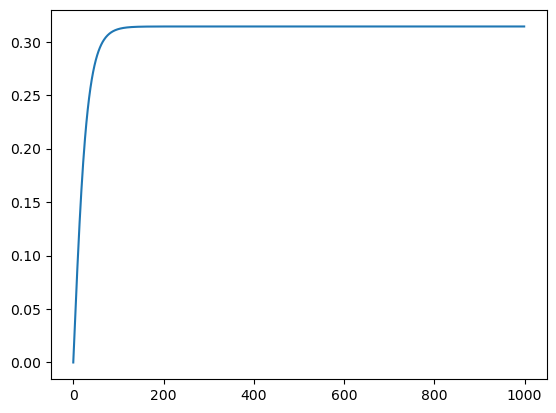

In [17]:
results_test_np = results_test.detach().numpy() # Convert to numpy array

# 2D plot
plt.plot(results_test_np[:,0])

plt.show()